In [19]:
#   Dependencies
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

#   Import the sqlalchemy extract function.
from sqlalchemy import extract


#   Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
engine = create_engine("sqlite:///hawaii.sqlite")

#   Reflect an existing database into a new model
Base = automap_base()
#   Reflect the tables
Base.prepare(engine, reflect=True)

#   Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
#   Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [22]:
#   Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

#   Creating a list variable for June Temperatures
junetemp = []
#   Creating a session query for temperatures in the month of June
junetemp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
#   Generating a dataframe from our session query list
junetemps = pd.DataFrame(junetemp, columns=['Date', 'Temperature'])
#   Printing the dataframe
junetemps

,Date,Temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [23]:
#   Calculate and print out the summary statistics for the June temperature DataFrame.
junetemps.describe()

,Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [24]:
#   Convert the December temperatures to a list.
dectemp = []
#   Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dectemp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
#   Generating a dataframe from our session query list
dectemps = pd.DataFrame(dectemp, columns=['Date', 'Temperature'])
#   Printing out our dataframe dectemps
dectemps

,Date,Temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [25]:
#   Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dectemps.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# **ADDITIONAL QUERIES**

In [26]:
adquery = []
adquery = session.query(Measurement.date, Measurement.station, Measurement.tobs, Measurement.prcp).all()
adqueries = pd.DataFrame(adquery, columns=['Date', 'Station', 'Temperature', 'Precipitation'])
adqueries

,Date,Station,Temperature,Precipitation
0,2010-01-01,USC00519397,65.0,0.08
1,2010-01-02,USC00519397,63.0,0.00
2,2010-01-03,USC00519397,74.0,0.00
3,2010-01-04,USC00519397,76.0,0.00
4,2010-01-06,USC00519397,73.0,NaN
...,...,...,...,...
19545,2017-08-19,USC00516128,71.0,0.09
19546,2017-08-20,USC00516128,78.0,NaN
19547,2017-08-21,USC00516128,76.0,0.56
19548,2017-08-22,USC00516128,76.0,0.50


In [27]:
session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [28]:
juneprcp = []
juneprcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
juneprcp = pd.DataFrame(juneprcp, columns=['Date', 'Precipitation'])
juneprcp

,Date,Precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [29]:
decprcp = []
decprcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
decprcp = pd.DataFrame(decprcp, columns=['Date', 'Precipitation'])
decprcp


,Date,Precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


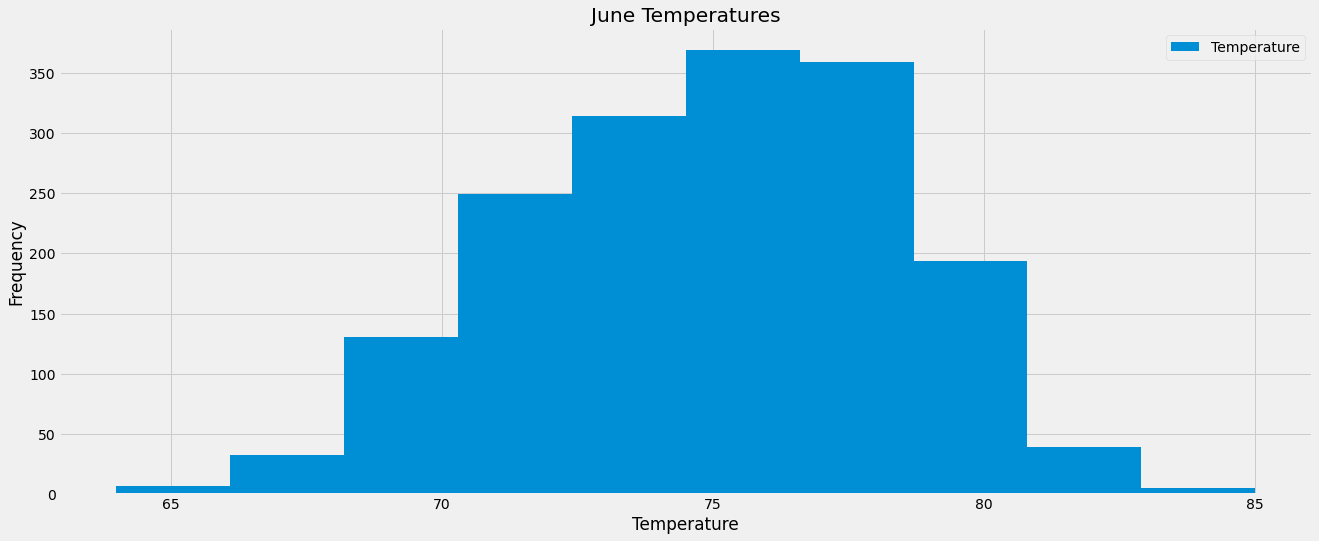

In [30]:
junetemps.plot(kind='hist', figsize=(20,8), title='June Temperatures')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

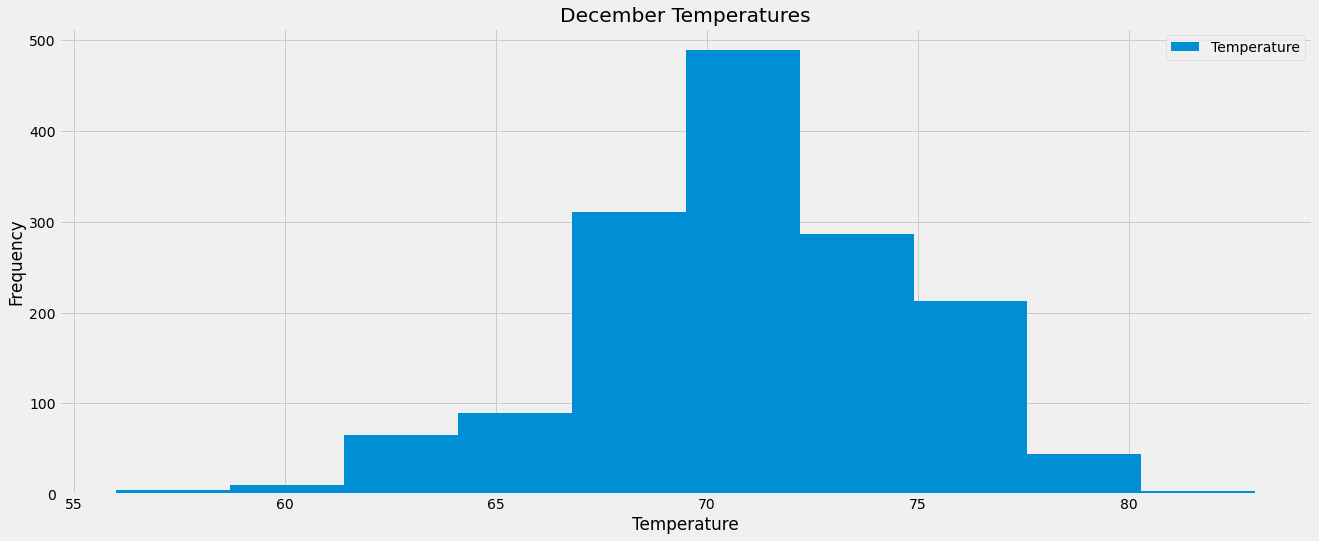

In [31]:
dectemps.plot(kind='hist', figsize=(20,8), title='December Temperatures')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

In [32]:
junetemps.describe()

,Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [33]:
dectemps.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [34]:
juneprcp.describe()

,Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [35]:
decprcp.describe()

,Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [36]:
#   Writing over the original dataframe just created with "inplace=True" to set the index to date column
juneprcp.set_index(juneprcp['Date'], inplace=True)


#   Printing out the dataframe without the index, by converting the Dataframe to strings and set our "index=False"
print(juneprcp.to_string(index=False))

      Date  Precipitation
2010-06-01           0.00
2010-06-02           0.01
2010-06-03           0.00
2010-06-04           0.00
2010-06-05           0.00
2010-06-06           0.00
2010-06-07           0.00
2010-06-08           0.00
2010-06-09           0.00
2010-06-10           0.00
2010-06-11           0.00
2010-06-12           0.00
2010-06-13           0.00
2010-06-14           0.00
2010-06-15           0.00
2010-06-16           0.00
2010-06-17           0.00
2010-06-18           0.00
2010-06-19           0.00
2010-06-20           0.00
2010-06-21           0.00
2010-06-22           0.00
2010-06-23           0.00
2010-06-24           0.00
2010-06-25           0.00
2010-06-26           0.02
2010-06-27           0.00
2010-06-28           0.00
2010-06-29           0.00
2010-06-30           0.00
2011-06-01           0.07
2011-06-02           0.00
2011-06-03           0.56
2011-06-04           0.89
2011-06-05           0.00
2011-06-06           0.00
2011-06-07           0.00
2011-06-08  

In [37]:
juneprcp = juneprcp.sort_index()
print(juneprcp.to_string(index=False))

      Date  Precipitation
2010-06-01           0.00
2010-06-01           0.01
2010-06-01           0.00
2010-06-01            NaN
2010-06-01           0.03
2010-06-01           0.00
2010-06-01           0.00
2010-06-01           0.08
2010-06-01           0.03
2010-06-02           0.00
2010-06-02           0.03
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.03
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.00
2010-06-02           0.01
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.10
2010-06-03           0.00
2010-06-03           0.14
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.00
2010-06-03           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.01
2010-06-04           0.00
2010-06-04           0.00
2010-06-04           0.00
2010-06-05           0.00
2010-06-05  

In [38]:
#   Writing over the original dataframe just created with "inplace=True" to set the index to date column
decprcp.set_index(decprcp['Date'], inplace=True)


#   Printing out the dataframe without the index, by converting the Dataframe to strings and set our "index=False"
print(decprcp.to_string(index=False))

      Date  Precipitation
2010-12-01           0.04
2010-12-03           0.00
2010-12-04           0.00
2010-12-06           0.00
2010-12-07           0.00
2010-12-08           0.00
2010-12-09           0.00
2010-12-10           1.58
2010-12-11           0.77
2010-12-12           0.00
2010-12-13           0.00
2010-12-14           0.00
2010-12-15           0.00
2010-12-16           0.00
2010-12-17           0.00
2010-12-18           0.00
2010-12-19           1.40
2010-12-23           0.00
2010-12-24           0.00
2010-12-26            NaN
2010-12-27           0.13
2010-12-28           0.55
2010-12-29           0.06
2010-12-30           0.01
2010-12-31           0.00
2011-12-01           0.03
2011-12-02           0.08
2011-12-03           0.00
2011-12-04           0.00
2011-12-05           0.00
2011-12-06           0.00
2011-12-07           0.00
2011-12-08           0.00
2011-12-09           0.13
2011-12-10           0.07
2011-12-11           0.07
2011-12-12           0.08
2011-12-13  

In [39]:
decprcp = decprcp.sort_index()
print(decprcp.to_string(index=False))

      Date  Precipitation
2010-12-01           0.04
2010-12-01           0.03
2010-12-01           0.70
2010-12-01           0.03
2010-12-01           1.35
2010-12-01           0.13
2010-12-01           1.48
2010-12-01           0.76
2010-12-02            NaN
2010-12-02           0.16
2010-12-02           0.06
2010-12-02           0.26
2010-12-02           0.00
2010-12-02           0.13
2010-12-02           0.02
2010-12-02           0.18
2010-12-03           1.59
2010-12-03           0.01
2010-12-03           0.78
2010-12-03           0.00
2010-12-03           0.22
2010-12-03           0.01
2010-12-03           0.47
2010-12-03           0.16
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.19
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.00
2010-12-04           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05           0.00
2010-12-05            NaN
2010-12-05  

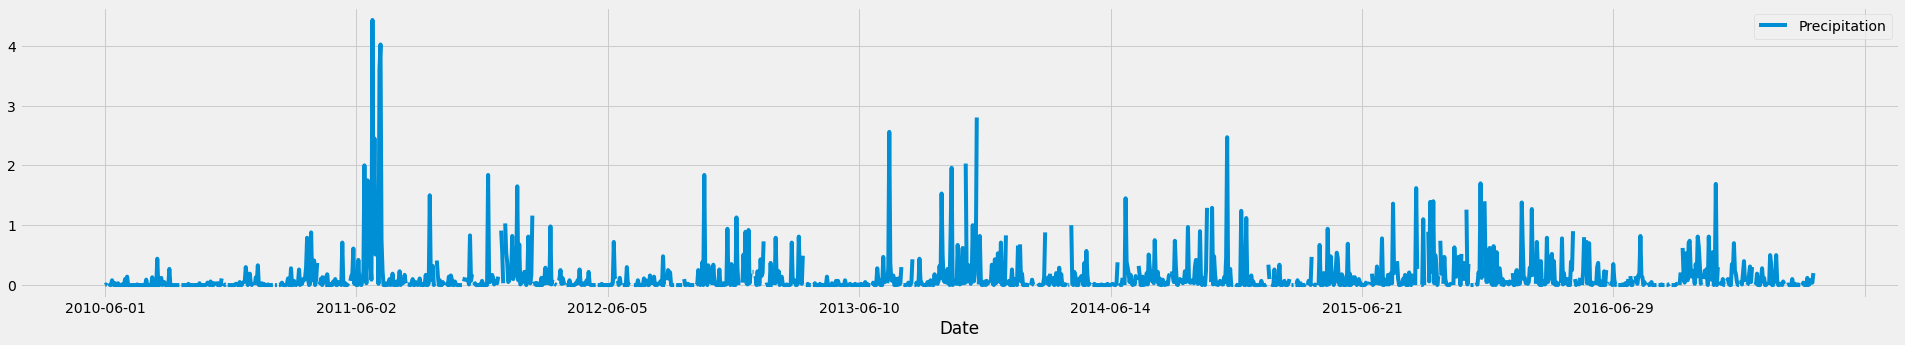

In [40]:
juneprcp.plot(figsize=(30, 5))
plt.show()

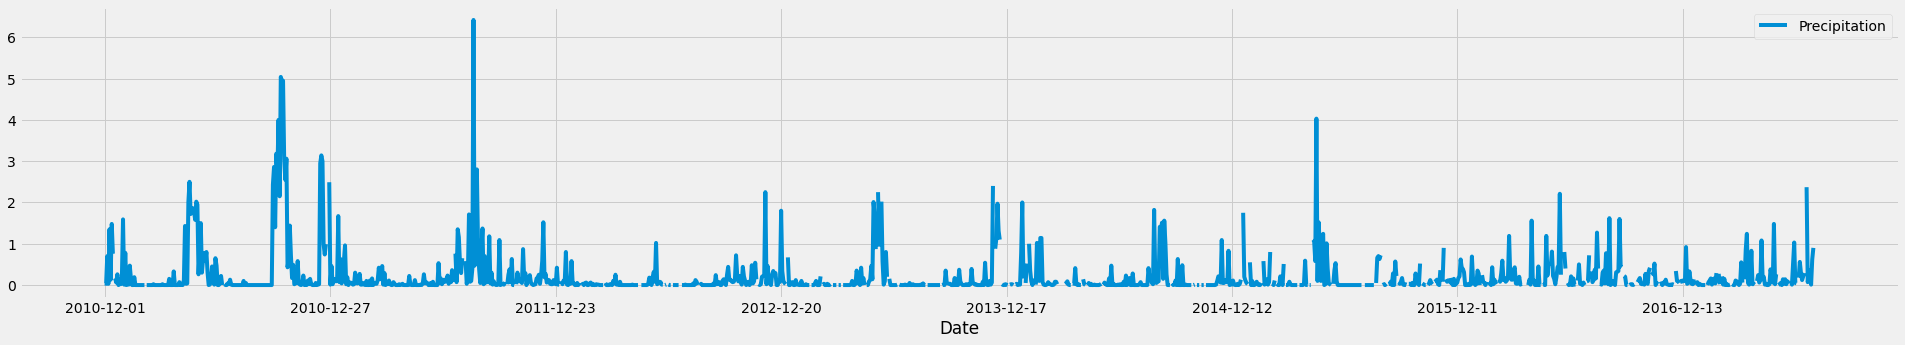

In [41]:
decprcp.plot(figsize=(30, 5))
plt.show()